In [1]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

In [2]:
from train_utils import SslTransform

In [3]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])

train_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10(root='./data', train=True, transform=transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomCrop(32, 4),
        transforms.ToTensor(),
        normalize,
        SslTransform()
    ]), download=True),
    batch_size=128, shuffle=True,
    num_workers=1, pin_memory=True)

Files already downloaded and verified


In [4]:
batch_data, batch_label = next(iter(train_loader))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

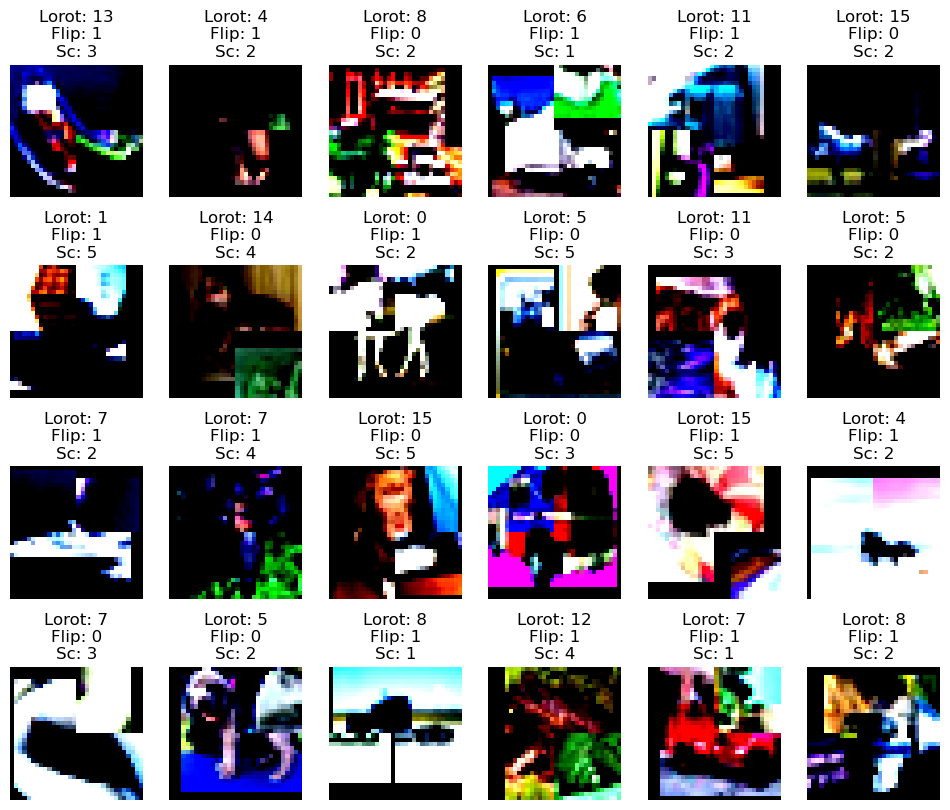

In [5]:
cols = 6
rows = 4
fig, axs = plt.subplots(rows, cols, figsize=(12,10))
smpl_idx = 0
for x in range(rows):
    for y in range(cols):
        title = f"Lorot: {batch_data[1][smpl_idx]}\nFlip: {batch_data[2][smpl_idx]}\nSc: {batch_data[3][smpl_idx]}"
        axs[x, y].set_title(title)
        axs[x, y].imshow(batch_data[0][smpl_idx].permute(1, 2, 0))
        smpl_idx += 1
        axs[x, y].set_axis_off()

plt.show()

In [1]:
from datasets.ssl_dataset import SSL_Dataset
from datasets.data_utils import get_data_loader
from utils import net_builder

In [2]:
import torch
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [3]:
from train_utils import SslTransform
import models.moe as moe

In [4]:
train_dset = SSL_Dataset(name='cifar10', train=True, 
                        num_classes=10, data_dir='./data')

In [5]:
lb_dset, ulb_dset = train_dset.get_ssl_dset(num_labels=400, 
                                            strong_transform=transforms.Compose([train_dset.transform,
                                                                                 SslTransform()]))                                            

Files already downloaded and verified


In [6]:
len(lb_dset), len(ulb_dset)

(400, 50000)

In [7]:
train_lb_loader = get_data_loader(lb_dset,
                                  batch_size=64,
                                  data_sampler="RandomSampler",
                                  num_iters=2**20,
                                  num_workers=1, 
                                  distributed=False)

In [8]:
train_ulb_loader = get_data_loader(ulb_dset,
                                   batch_size=64*7,
                                   data_sampler="RandomSampler",
                                   num_iters=2**20,
                                   num_workers=1, # harusnya 4*1
                                   distributed=False)

In [9]:
ulb_batch_data = next(iter(train_ulb_loader))

In [10]:
len(ulb_batch_data)

2

In [11]:
ulb_batch_data[0][0].shape

torch.Size([448, 3, 32, 32])

In [12]:
torch.stack(ulb_batch_data[0][1])

tensor([[14,  2,  8,  ...,  5,  3,  6],
        [ 1,  0,  0,  ...,  0,  1,  0],
        [ 3,  3,  3,  ...,  5,  1,  2]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

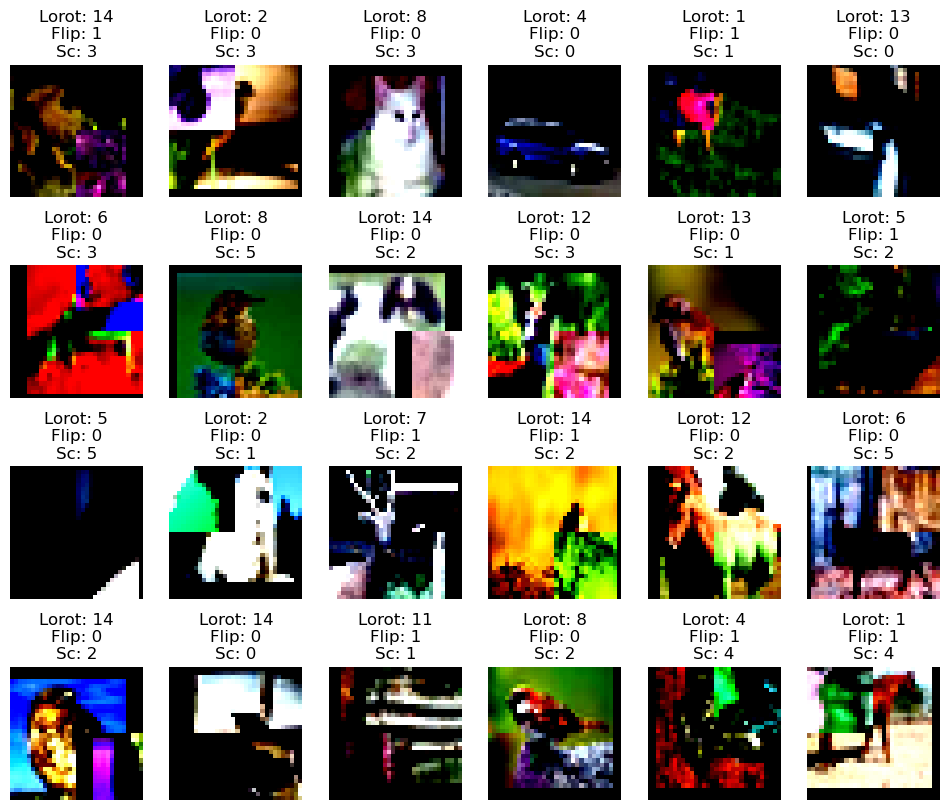

In [13]:
cols = 6
rows = 4
fig, axs = plt.subplots(rows, cols, figsize=(12,10))
smpl_idx = 0
for x in range(rows):
    for y in range(cols):
        title = f"Lorot: {ulb_batch_data[0][1][0][smpl_idx]}\nFlip: {ulb_batch_data[0][1][1][smpl_idx]}\nSc: {ulb_batch_data[0][1][2][smpl_idx]}"
        axs[x, y].set_title(title)
        axs[x, y].imshow(ulb_batch_data[0][0][smpl_idx].permute(1, 2, 0))
        smpl_idx += 1
        axs[x, y].set_axis_off()

plt.show()

In [14]:
cifar10_idx2label={0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

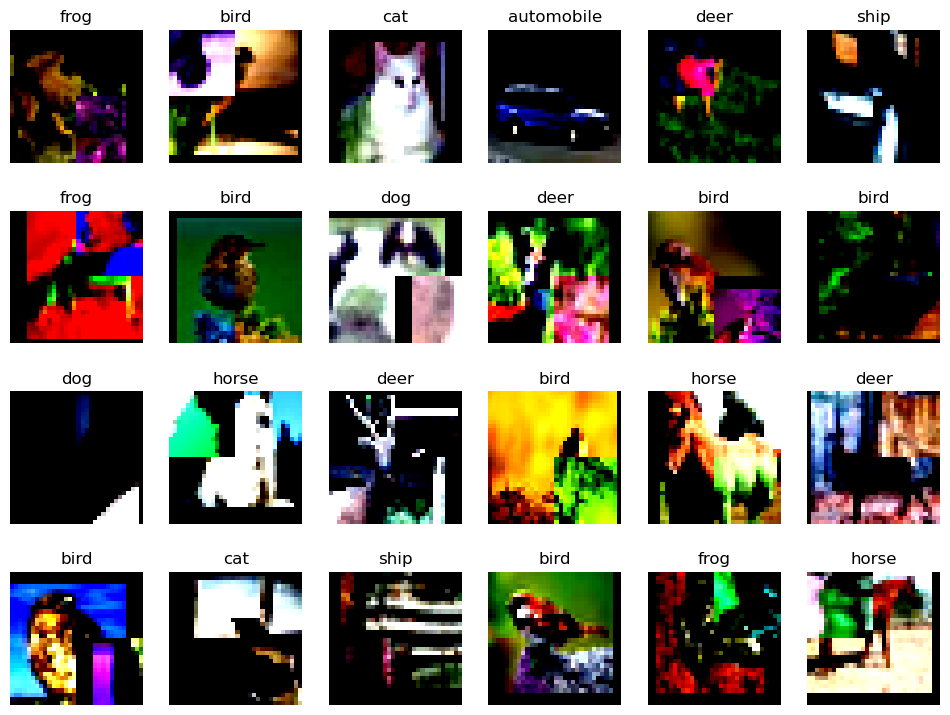

In [15]:
cols = 6
rows = 4
fig, axs = plt.subplots(rows, cols, figsize=(12,9))
smpl_idx = 0
for x in range(rows):
    for y in range(cols):
        # title = f"Lorot: {ulb_batch_data[1][1][smpl_idx]}\nFlip: {ulb_batch_data[1][2][smpl_idx]}\nSc: {ulb_batch_data[1][3][smpl_idx]}"
        axs[x, y].set_title(cifar10_idx2label[ulb_batch_data[1][smpl_idx].item()])
        axs[x, y].imshow(ulb_batch_data[0][0][smpl_idx].permute(1, 2, 0))
        smpl_idx += 1
        axs[x, y].set_axis_off()
plt.show()

In [16]:
model_builder = net_builder(net_name='WideResNet', 
                          from_name=False,
                          net_conf={'depth': 28, 
                           'widen_factor': 2,
                           'leaky_slope': 0.1,
                           'bn_momentum': 1.0-0.999,
                           'dropRate':0.0})

depth in <models.nets.wrn.build_WideResNet object at 0x7f7b08659c00> is overlapped by kwargs: 28 -> 28
widen_factor in <models.nets.wrn.build_WideResNet object at 0x7f7b08659c00> is overlapped by kwargs: 2 -> 2
leaky_slope in <models.nets.wrn.build_WideResNet object at 0x7f7b08659c00> is overlapped by kwargs: 0.0 -> 0.1
bn_momentum in <models.nets.wrn.build_WideResNet object at 0x7f7b08659c00> is overlapped by kwargs: 0.01 -> 0.0010000000000000009
dropRate in <models.nets.wrn.build_WideResNet object at 0x7f7b08659c00> is overlapped by kwargs: 0.0 -> 0.0


In [17]:
model = moe.Moe1(model_builder, num_classes=10)

In [18]:
model

Moe1(
  (backbone): WideResNet(
    (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (block1): NetworkBlock(
      (layer): Sequential(
        (0): BasicBlock(
          (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.0010000000000000009, affine=True, track_running_stats=True)
          (relu1): LeakyReLU(negative_slope=0.1, inplace=True)
          (conv1): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.0010000000000000009, affine=True, track_running_stats=True)
          (relu2): LeakyReLU(negative_slope=0.1, inplace=True)
          (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (convShortcut): Conv2d(16, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        )
        (1): BasicBlock(
          (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.0010000000000000009, affine=True, track_running_stats=True)
          

In [19]:
_,_,_,_,gate = model(ulb_batch_data[0][0])

In [23]:
gate.shape

torch.Size([448, 3])

In [25]:
F.softmax(gate, dim=1).mean(dim=0)

tensor([0.3733, 0.3520, 0.2747], grad_fn=<MeanBackward1>)